In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from bs4 import BeautifulSoup as bs
import pandas as pd
import requests

In [44]:
df = pd.read_csv("draft_combine_train.csv")
df

,player_id,player_name,yearDraft,yearCombine,numberPickOverall,position,height,weight,wingspan,reach_standing,standing_vertical,max_vertical,bench_reps,timeLaneAgility,timeThreeQuarterCourtSprint,timeModifiedLaneAgility,lengthHandInches,widthHandInches,body_fat_pct,drafted
0,202701.0,Nolan Smith,2011.0,2011,21.0,PG,73.50,187.6,77.50,99.0,28.5,34.0,9.0,11.05,3.17,NaN,8.50,9.25,5.6,True
1,203078.0,Bradley Beal,2012.0,2012,3.0,SG,75.25,201.8,80.00,100.0,33.0,39.0,8.0,10.95,3.28,NaN,8.50,9.00,6.0,True
2,2049.0,Speedy Claxton,2000.0,2000,20.0,PG,70.50,166.0,72.00,94.5,36.0,42.5,6.0,10.48,3.06,NaN,NaN,NaN,NaN,True
3,202718.0,Chandler Parsons,2011.0,2011,38.0,SF,80.75,221.2,81.50,104.5,25.5,31.5,4.0,11.05,3.29,NaN,8.25,10.00,7.0,True
4,201446.0,Mike Taylor,2008.0,2008,55.0,SG-PG,72.75,166.2,79.25,98.0,31.0,39.0,2.0,10.98,3.08,NaN,NaN,NaN,3.8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1629617.0,Reggie Perry,2020.0,2019,57.0,SF-PF,80.00,250.8,84.50,106.0,28.5,31.5,15.0,12.46,3.30,3.40,9.00,10.00,6.7,True
1112,12132.0,Eric Coley,NaN,2000,NaN,SG-SF,76.00,205.0,83.00,102.0,35.0,38.0,10.0,11.40,3.15,NaN,NaN,NaN,NaN,False
1113,2090.0,Justin Love,NaN,2000,NaN,PG-SG,73.50,205.5,76.50,97.5,31.0,38.5,24.0,10.99,3.31,NaN,NaN,NaN,NaN,False
1114,1628977.0,Hamidou Diallo,2018.0,2017,45.0,SG-SF,75.75,197.4,83.25,101.5,34.5,44.5,0.0,10.88,3.11,2.79,8.50,9.50,5.2,True


In [45]:
df.drop(["player_id", "timeModifiedLaneAgility"], axis=1, inplace=True)

# Convertir medidas a sistema métrico
df[['height', 'wingspan', 'max_vertical', 'standing_vertical', 'reach_standing', 'lengthHandInches', 'widthHandInches']] *= 2.54
df.columns = df.columns.str.replace('Inches', '')
df[["weight"]] *= 0.453592

df = df.round(1)

In [46]:
#bench_reps = repeticiones 185lbs(84 kg)
df = df.dropna(thresh=df.shape[1] - 4)
nan_counts = df.isna().sum()
print(nan_counts)


player_name                      0
yearDraft                      325
yearCombine                      0
numberPickOverall              325
position                         1
height                           0
weight                           0
wingspan                         0
reach_standing                   0
standing_vertical                5
max_vertical                     4
bench_reps                     135
timeLaneAgility                 11
timeThreeQuarterCourtSprint      9
lengthHand                     449
widthHand                      449
body_fat_pct                    73
drafted                          0
dtype: int64


In [47]:
df.info()
df.to_csv("DraftCombine.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 1115
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_name                  889 non-null    object 
 1   yearDraft                    564 non-null    float64
 2   yearCombine                  889 non-null    int64  
 3   numberPickOverall            564 non-null    float64
 4   position                     888 non-null    object 
 5   height                       889 non-null    float64
 6   weight                       889 non-null    float64
 7   wingspan                     889 non-null    float64
 8   reach_standing               889 non-null    float64
 9   standing_vertical            884 non-null    float64
 10  max_vertical                 885 non-null    float64
 11  bench_reps                   754 non-null    float64
 12  timeLaneAgility              878 non-null    float64
 13  timeThreeQuarterCou

/tmp/ipykernel_15045/247369203.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



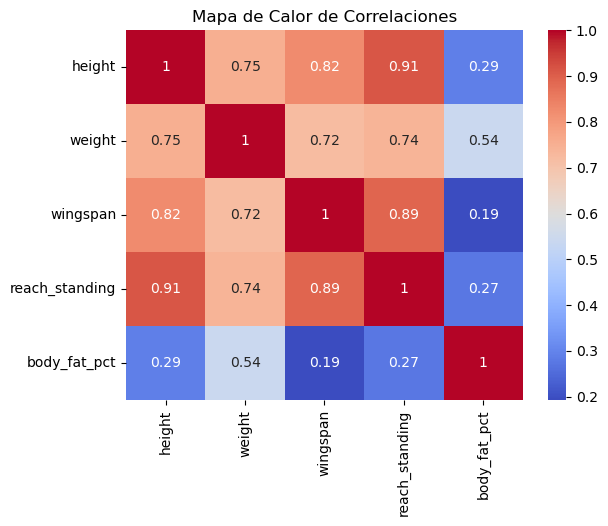

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'PG',
              'type': 'box',
              'y': array([186.7, 179.1, 184.2, 181.6, 174.6, 185.4, 185.4, 179.7, 189.2, 178.4,
                          189.2, 186.1, 186.7, 191.1, 185.4, 188. , 177.8, 189.9, 177.2, 188. ,
                          174.6, 175.3, 188. , 184.2, 177.2, 185.4, 181.6, 186.7, 181.6, 189.2,
                          191.8, 181. , 180.3, 193.7, 186.7, 185.4, 186.7, 182.9, 190.5, 191.1,
                          182.9, 182.2, 189.2, 185.4, 182.9, 190.5, 176.5, 183.5, 186.7, 182.2,
                          185.4, 180.3, 182.9, 188. , 184.2, 185.4, 177.8, 185.4, 189.9, 182.2,
                          188. , 186.7, 188.6, 175.3, 189.2, 185.4, 184.8, 186.1, 189.2, 181. ,
                          186.1, 194.9, 188. , 183.5, 183.5, 179.1, 185.4, 184.8, 190.5, 187.3,
                          181.6, 184.8, 193. , 181.6, 182.2, 176.5, 193. , 194.3, 188.6, 188. ,
                          179.7, 191.1, 188. , 180.3, 177.2, 187.3, 185.4, 180.3, 183.5, 181.6,
                          173.4, 172.1, 184.2, 178.4, 185.4, 176.5, 179.1, 174.6, 183.5, 189.9,
                          182.2, 188.6, 183.5, 177.2, 182.9, 193.7, 194.9, 180.3, 181. , 183.5,
                          186.1, 185.4, 181. , 186.1, 183.5, 182.9, 183.5, 189.2, 184.2, 185.4,
                          184.8, 179.7, 183.5, 184.2, 175.3, 191.1])},
             {'name': 'PG-SG',
              'type': 'box',
              'y': array([187.3, 191.1, 196.8, 182.2, 189.9, 186.7, 184.2, 184.8, 188. , 185.4,
                          191.1, 181.6, 187.3, 198.8, 190.5, 191.1, 183.5, 182.2, 191.1, 184.8,
                          193.7, 185.4, 186.1, 191.1, 188.6, 196.2, 184.2, 184.2, 194.9, 189.9,
                          188. , 186.7, 188. , 186.1, 182.2, 184.8, 196.2, 186.7])},
             {'name': 'SG-PG',
              'type': 'box',
              'y': array([184.8, 190.5, 188. , 188.6, 184.8, 190.5, 188. , 186.1, 191.1, 191.8,
                          192.4, 193. , 196.2, 187.3, 189.2, 192.4, 188.6, 189.2, 188.6, 191.8,
                          191.8, 191.1, 192.4, 182.2, 197.5, 188. ])},
             {'name': 'SG',
              'type': 'box',
              'y': array([191.1, 194.9, 197.5, 186.7, 188. , 191.8, 190.5, 196.2, 191.8, 193.7,
                          186.7, 191.8, 196.2, 192.4, 193.7, 190.5, 188.6, 188. , 193. , 189.2,
                          190.5, 193.7, 191.8, 190.5, 193. , 193. , 191.1, 194.3, 193. , 194.3,
                          188. , 192.4, 192.4, 193. , 188. , 191.8, 194.9, 191.8, 190.5, 195.6,
                          195.6, 192.4, 190.5, 188. , 191.1, 190.5, 193.7, 191.8, 195.6, 193.7,
                          193.7, 196.8, 189.9, 188.6, 193. , 191.1, 194.3, 194.3, 193. , 190.5,
                          193.7, 196.2, 194.3, 194.9, 187.3, 196.2, 194.3, 189.2, 195.6, 189.9,
                          193.7, 196.2, 186.1, 190.5, 194.3, 189.2, 189.9, 196.2, 185.4, 191.8,
                          193. , 190.5, 186.7, 191.8, 189.9, 195.6, 194.3, 189.2, 189.9, 193.7,
                          195.6, 189.9, 192.4, 189.2, 191.8, 193. , 186.7, 188.6, 194.3, 190.5,
                          190.5, 193.7, 194.3, 200.7, 190.5, 193. , 190.5, 190.5, 195.6, 191.1,
                          195.6, 184.8, 193. , 189.9, 193. , 191.8, 190.5, 189.9, 194.9, 190.5,
                          188.6, 195.6, 191.1])},
             {'name': 'SG-SF',
              'type': 'box',
              'y': array([196.8, 188. , 196.2, 199.4, 195.6, 196.8, 195.6, 197.5, 201.3, 193.7,
                          194.3, 195.6, 193. , 199.4, 196.8, 194.9, 194.9, 198.1, 193. , 194.3,
                          193.7, 194.9, 196.8, 193.7, 194.3, 195.6, 194.9, 197.5, 196.2, 196.8,
                          195.6, 200.7, 192.4, 195.6, 194.9, 194.3, 196.2, 191.8, 198.1, 195.6,
                          193. , 199.4, 193. , 196.8, 194.3, 189.9, 198.8, 197.5, 196.8, 193. ,
                          198.8, 189.2, 200.7, 198.8, 199.4,

In [48]:
# Mapa de Calor
corr_matrix = df[['height', "position", 'weight', 'wingspan', 'reach_standing', "body_fat_pct"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


# Gráfico de Caja
fig_box = go.Figure()
positions = ['PG', "PG-SG", "SG-PG", 'SG', "SG-SF", "SF-SG", 'SF', "SF-PF", "PF-SF", 'PF', "PF-C", "C-PF", 'C']
for position in positions:
    fig_box.add_trace(go.Box(y=df[df['position'] == position]['height'], name=position))
fig_box.update_layout(title='Distribución de Altura por Posición')
fig_box